In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import random
import os
import cv2
from time import time
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from sklearn.metrics import confusion_matrix
import seaborn as sns

from matplotlib import style
style.use('fivethirtyeight')

In [2]:
#Import the functions that I defined using python built-in magic command "run".
%run visualize_classes.ipynb 
%run traindata_statistics.ipynb
%run visualize_testdata.ipynb
%run load_traindata.ipynb
%run shuffle_data.ipynb
%run split_data.ipynb
%run one_hot_encoding.ipynb
%run configure_network.ipynb
%run create_model_3.ipynb
%run train_model.ipynb
%run load_testdata.ipynb
%run evaluate.ipynb

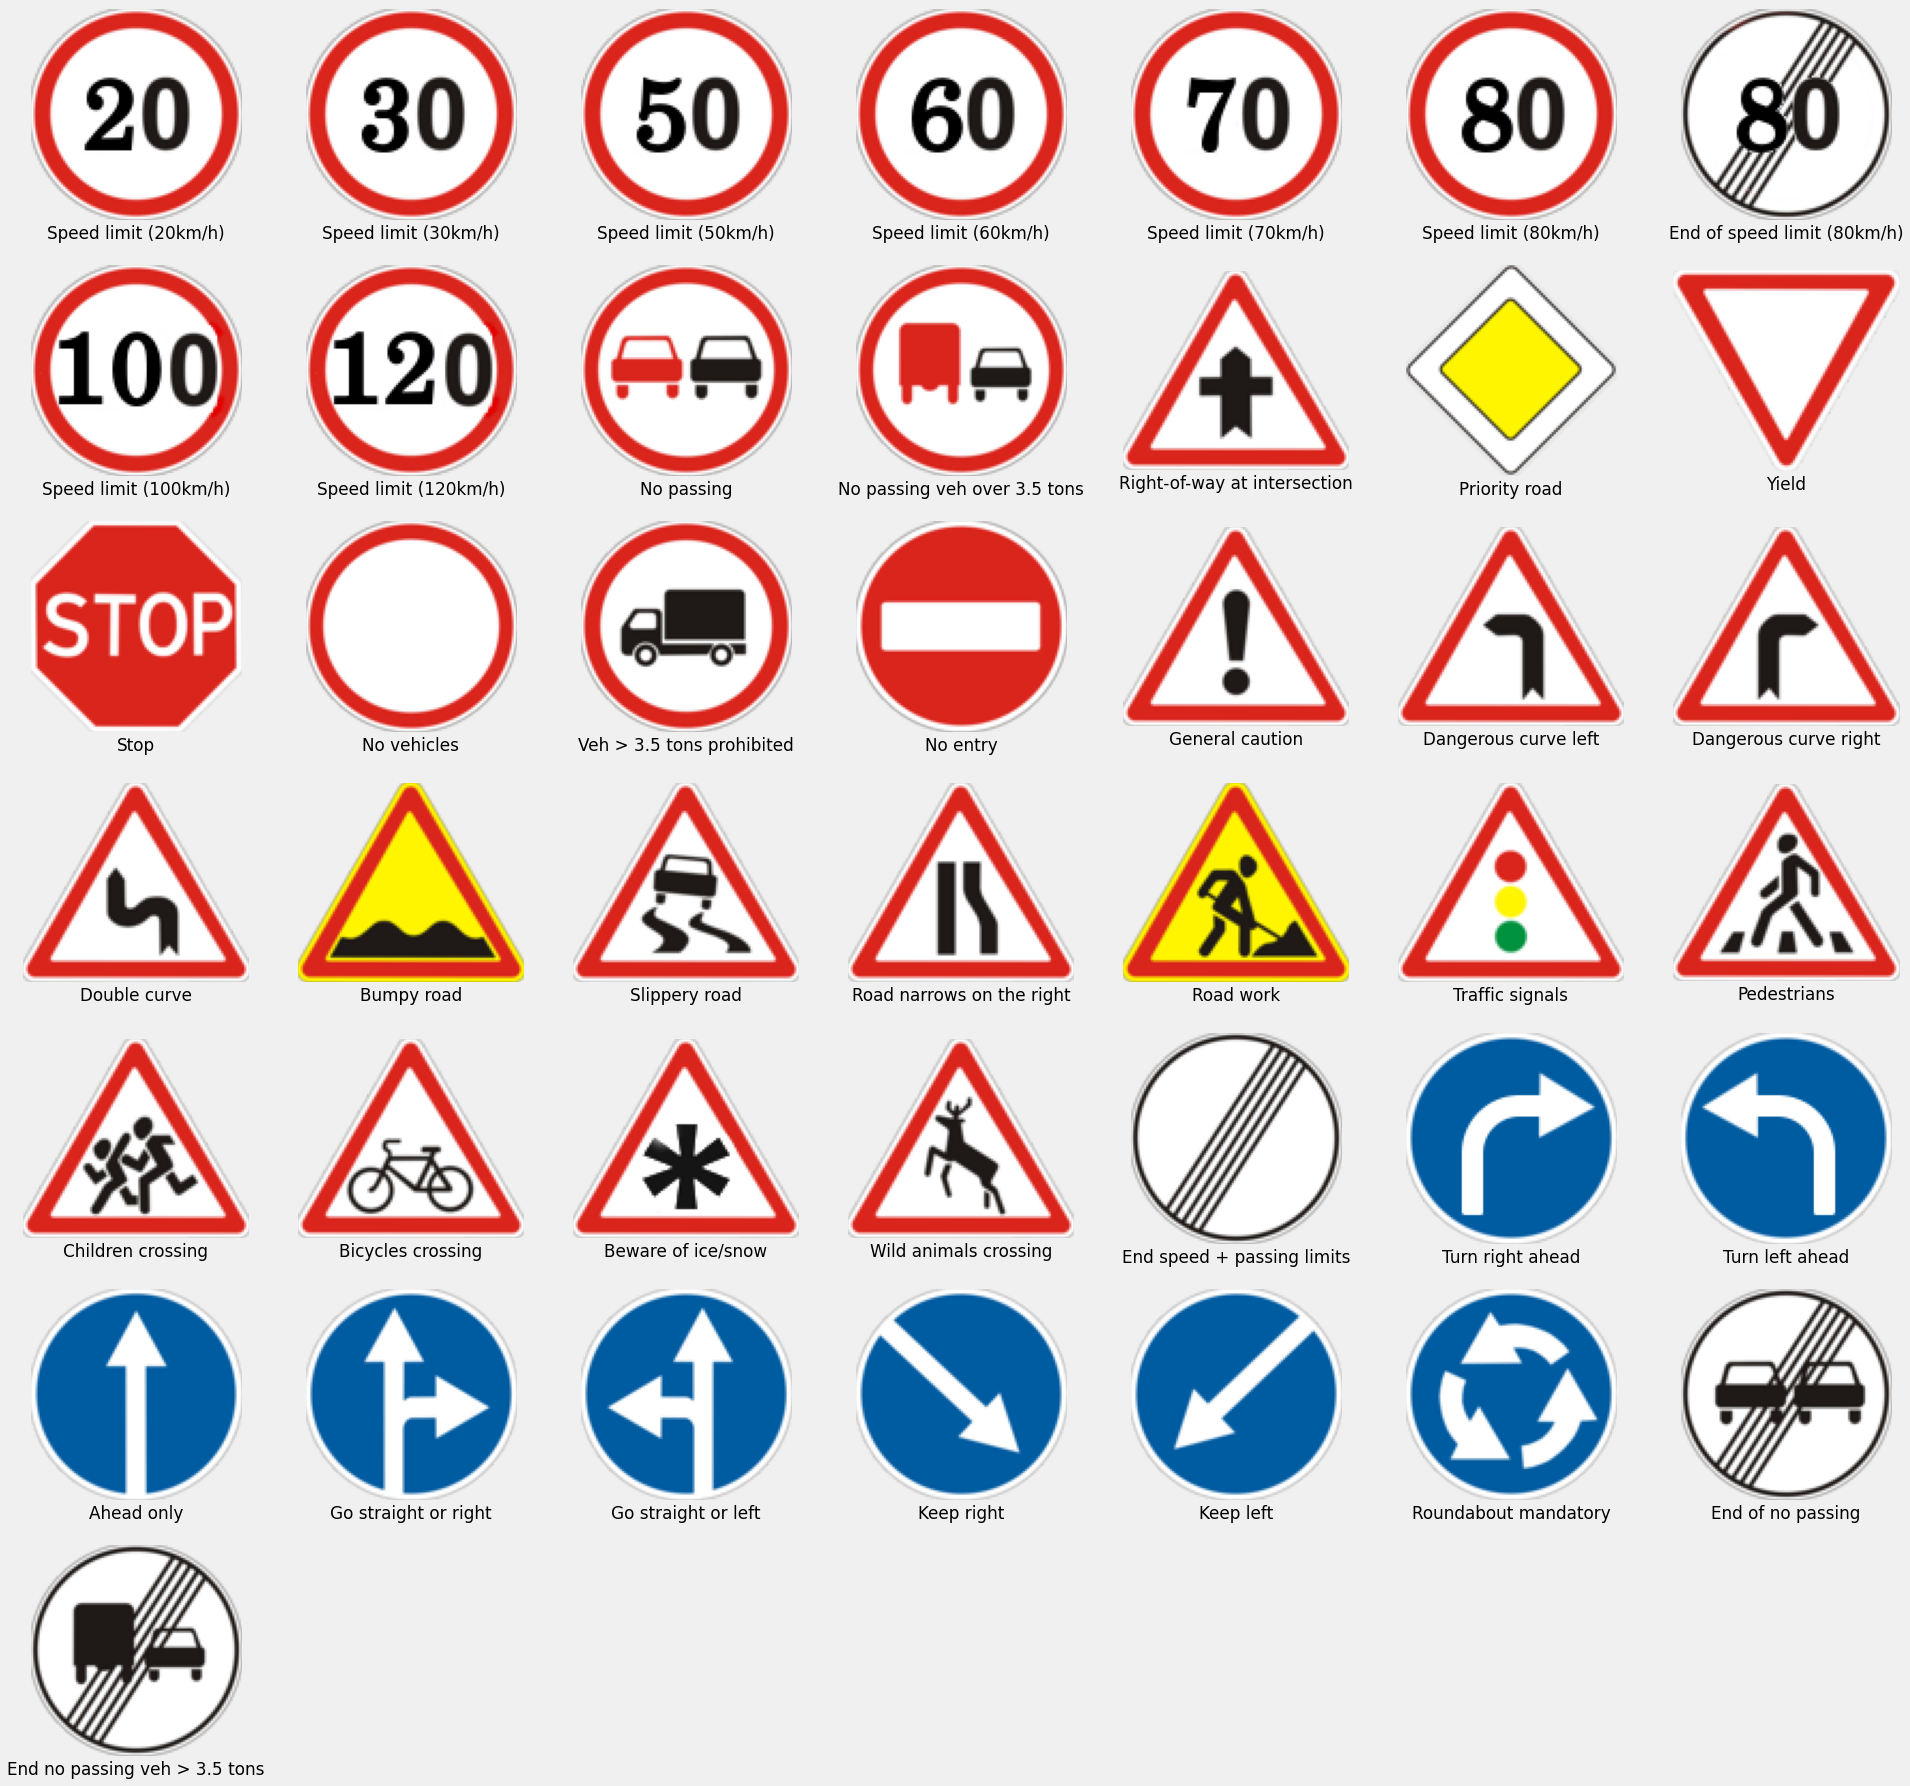

In [3]:
#Define the data directory and call visualize_classes function to print the traffic sign and label for each class
data_dir = '/Users/shahiraamin/Desktop/archive'
classes = visualize_classes(data_dir)

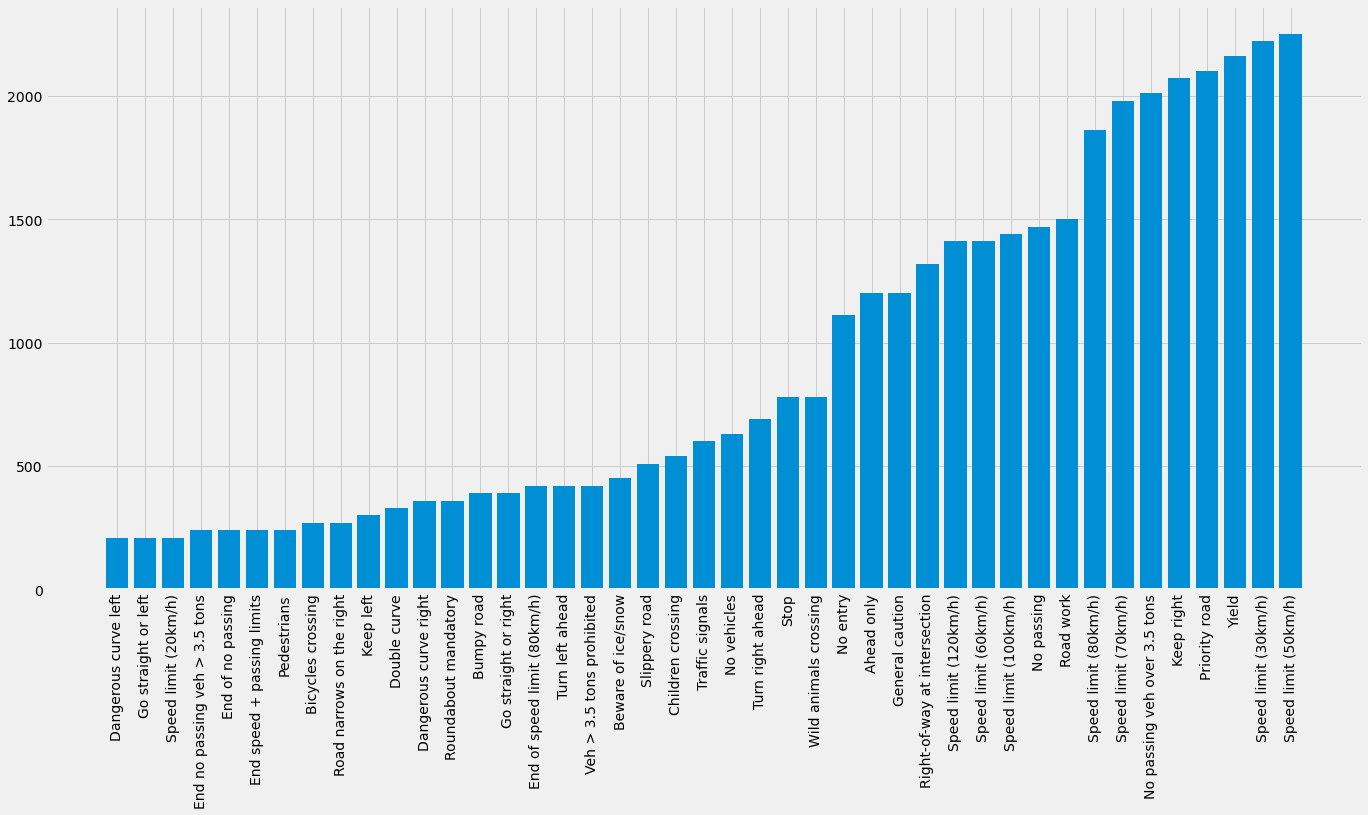

39209

In [4]:
#Call traindata_statistics function to calculate the number of training images provided in the dataset for each class
traindata_statistics(data_dir)

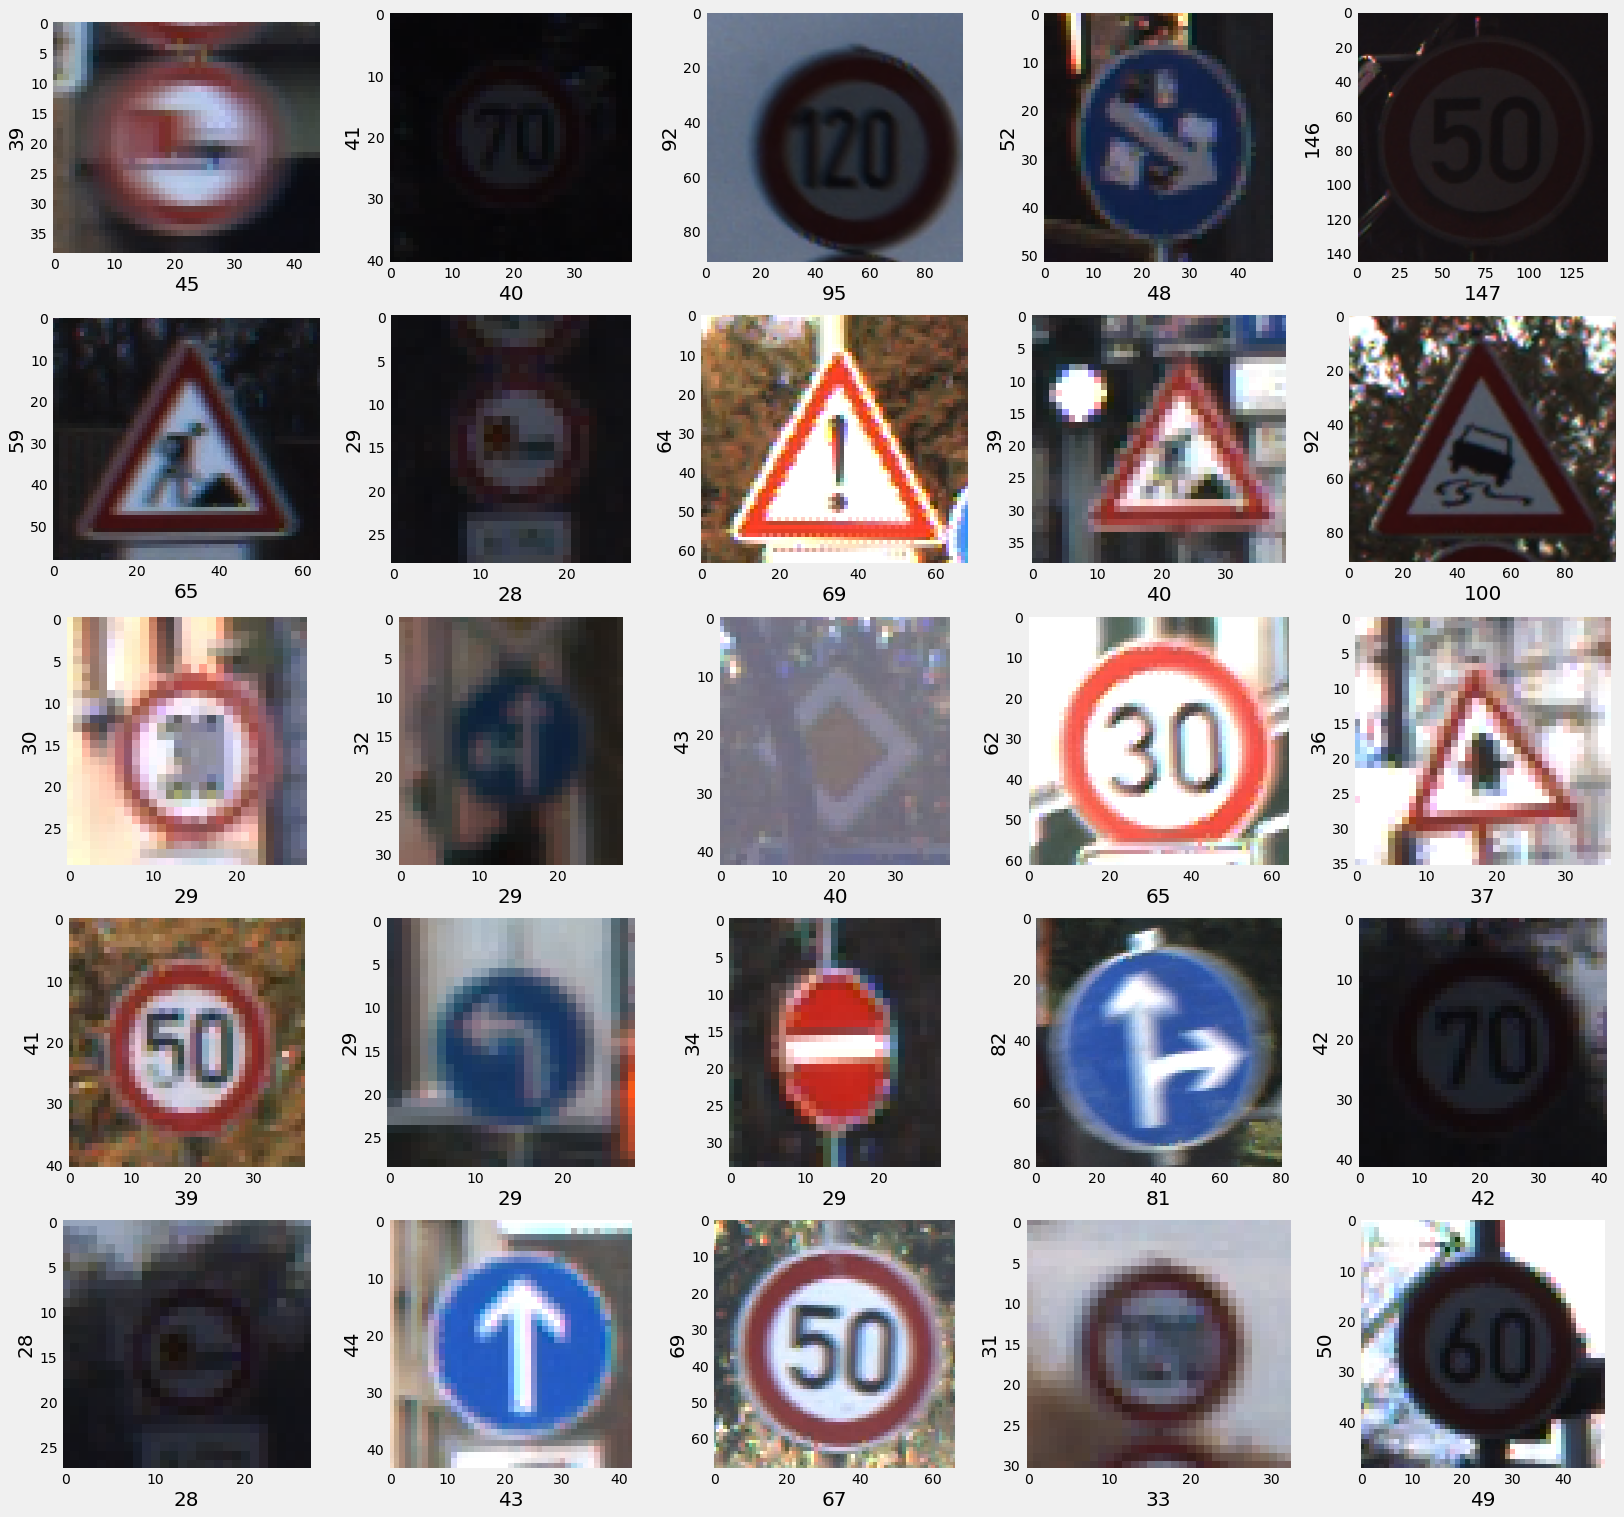

In [5]:
#Visualize 25 random samples from test data
visualize_testdata(data_dir)

In [6]:
#Define image width, height, and number of channels
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3
#Load the training data
img_data,img_labels = load_traindata(IMG_HEIGHT,IMG_WIDTH,len(classes),data_dir)
#Shuffle the training data
img_data,img_labels = shuffle_data(img_data,img_labels)

(39209, 30, 30, 3) (39209,)
(39209, 30, 30, 3) (39209,)


In [7]:
#split the training data into training set and validation set
X_train, X_val, y_train, y_val = split_data(img_data,img_labels)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [8]:
#one hot encoding of training labels and validation labels
ytrain = one_hot_encoding(y_train,len(classes))
yval = one_hot_encoding(y_val,len(classes))

ytrain.shape

(27446, 43)

In [9]:
#Configure the network parameters
lr,opt,epochs,batch_size = configure_network()
print(lr,epochs,batch_size)

0.001 30 50


In [11]:
#Create the model
model = create_model_3(IMG_HEIGHT,IMG_WIDTH,channels)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        448       
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 32)          4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 64)          18496     
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 43)                22059     
                                                                 
Total params: 177,227
Trainable params: 177,227
Non-tr

Epoch 1/30
549/549 [==============================] - 12s 22ms/step - loss: 2.1482 - accuracy: 0.3850 - val_loss: 1.0655 - val_accuracy: 0.6483
Epoch 2/30
549/549 [==============================] - 12s 21ms/step - loss: 1.3147 - accuracy: 0.5935 - val_loss: 0.6443 - val_accuracy: 0.7901
Epoch 3/30
549/549 [==============================] - 12s 21ms/step - loss: 0.9295 - accuracy: 0.7064 - val_loss: 0.4594 - val_accuracy: 0.8522
Epoch 4/30
549/549 [==============================] - 12s 21ms/step - loss: 0.6849 - accuracy: 0.7870 - val_loss: 0.3373 - val_accuracy: 0.8914
Epoch 5/30
549/549 [==============================] - 12s 21ms/step - loss: 0.5329 - accuracy: 0.8336 - val_loss: 0.2393 - val_accuracy: 0.9242
Epoch 6/30
549/549 [==============================] - 12s 21ms/step - loss: 0.4252 - accuracy: 0.8652 - val_loss: 0.1800 - val_accuracy: 0.9467
Epoch 7/30
549/549 [==============================] - 12s 21ms/step - loss: 0.3570 - accuracy: 0.8888 - val_loss: 0.1760 - val_accuracy:

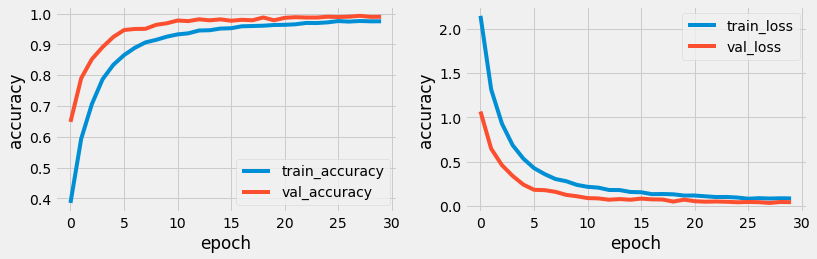

In [12]:
#Train the model
train_model(model,X_train,X_val,ytrain,yval,lr,opt,epochs,batch_size)

In [13]:
#Load test data
X_test, y_test = load_testdata(IMG_HEIGHT,IMG_WIDTH,data_dir)

(12630, 30, 30, 3) (12630,)


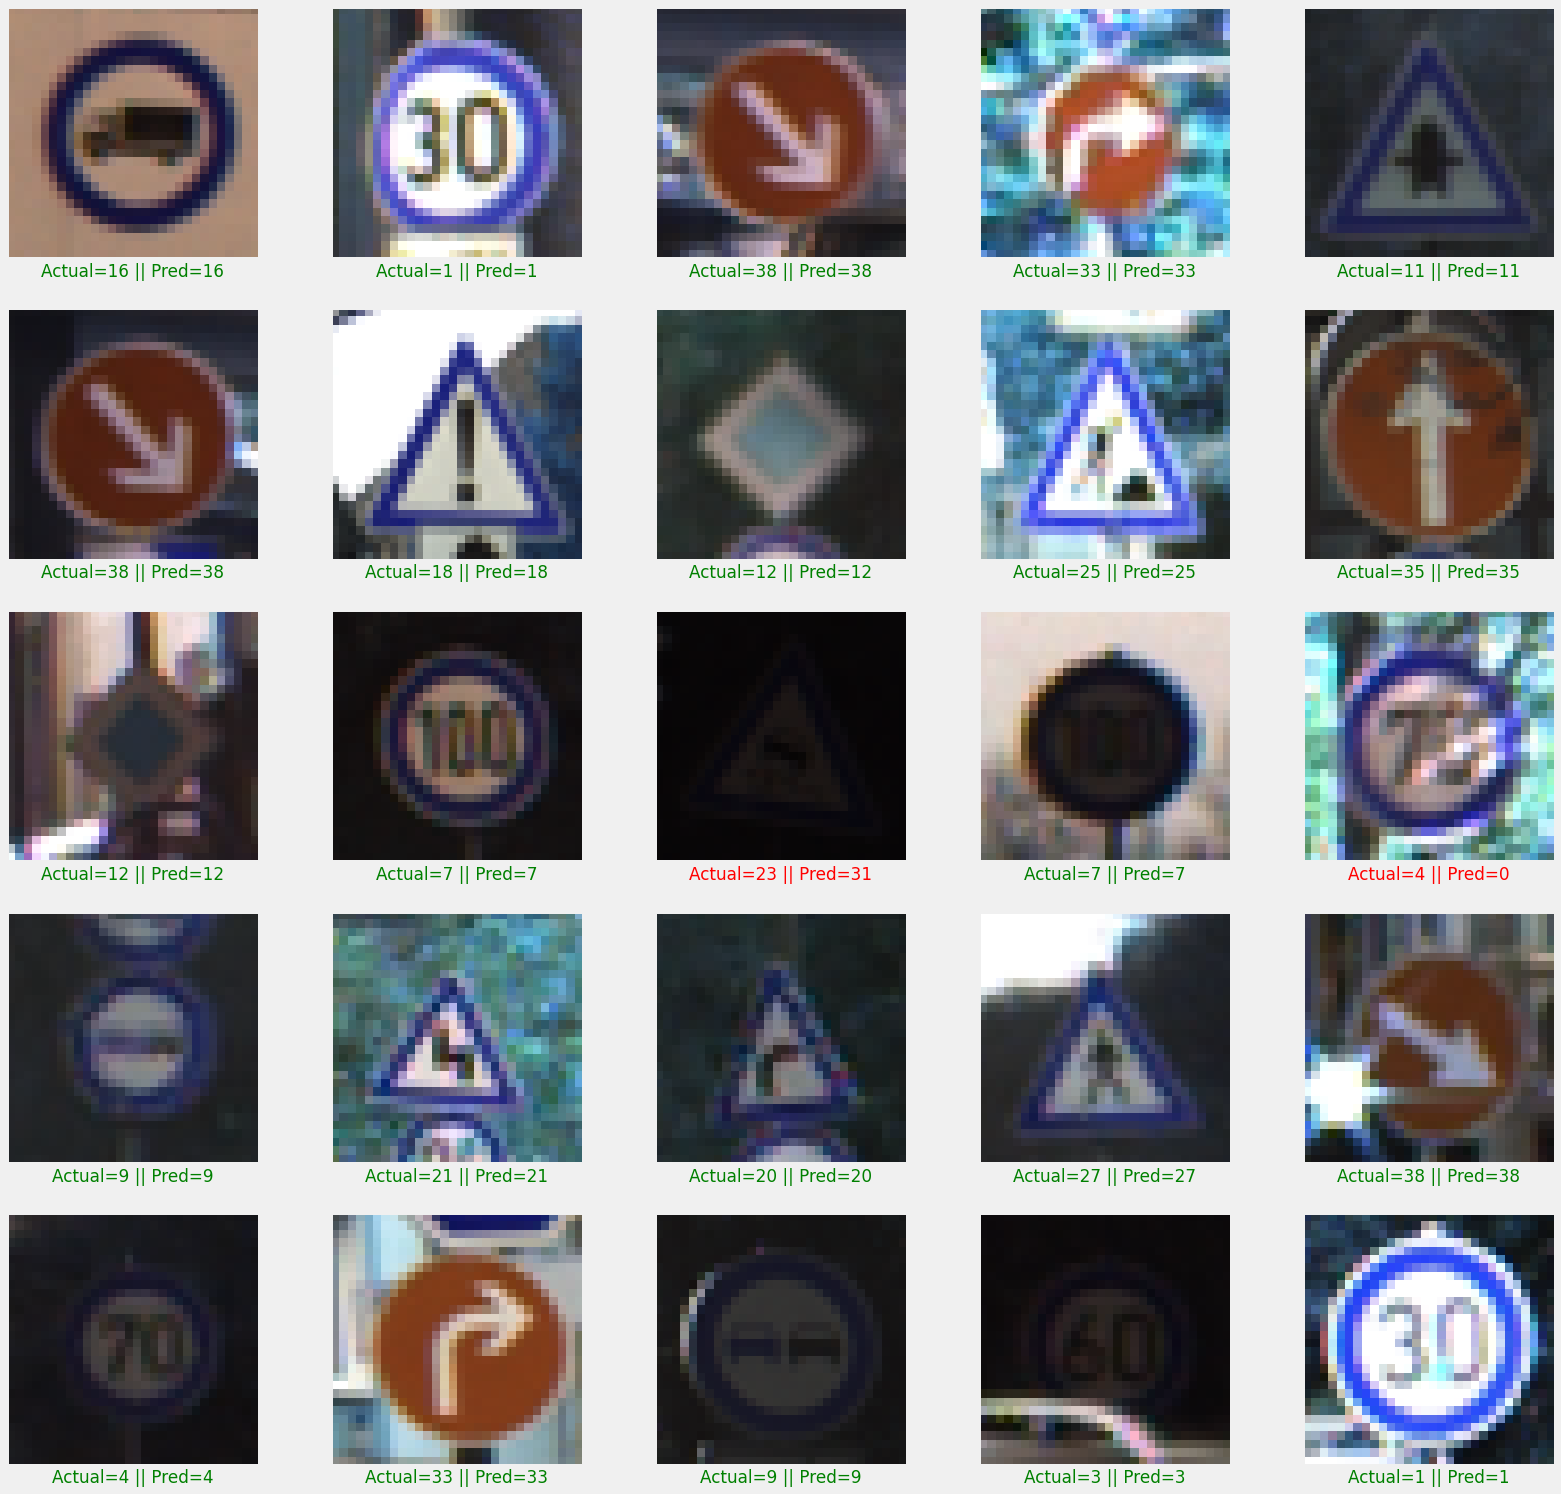

Test Data accuracy:  88.23436262866191


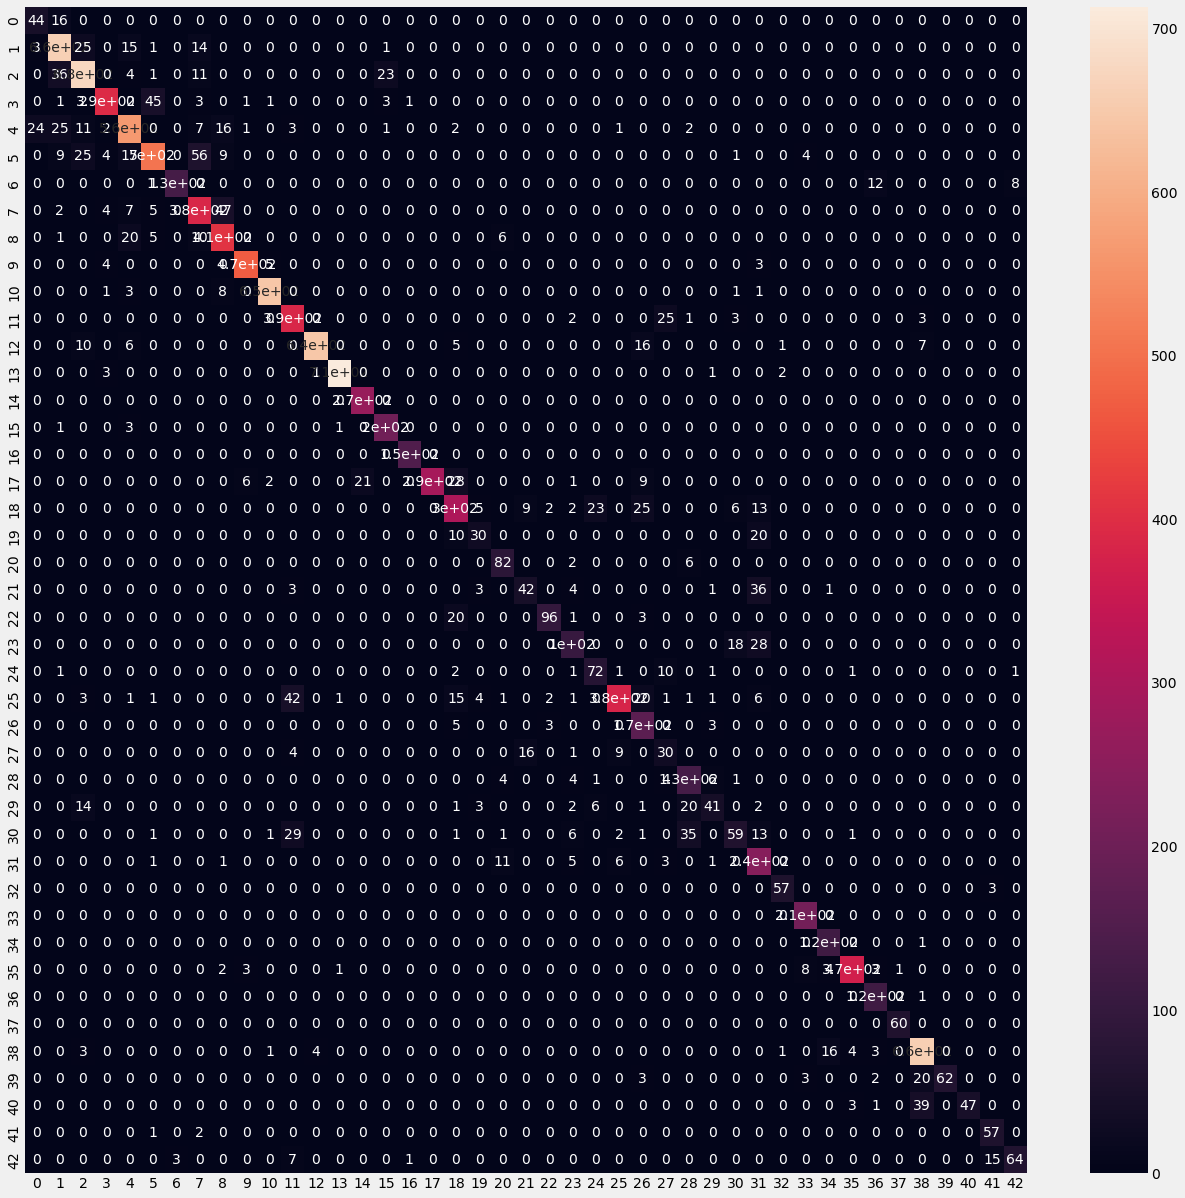

In [14]:
#Evaluate the trained model on the test data
#This will print the first 25 images in the test data along with their actual and predicated class numbers as x labels
#This will also print the test accuracy (%) and confusion matrix
evaluate(X_test,y_test,model)